<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/Practica26Al263158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 26

Aplicar de forma integral el proceso de entrenamiento, ajuste y evaluación de un clasificador tipo Árbol de Decisión sobre un conjunto de datos grande, aplicando técnicas robustas de validación cruzada y optimización de hiperparámetros.

##Actividades


###1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

* Declarar las bibliotecas necesarias para este proyecto
* Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import GridSearchCV

df=pd.read_csv('/content/drive/MyDrive/ClassFiles/TCGA_InfoWithGrade.csv')
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Sección nueva

##2. 📊 Análisis exploratorio de datos (EDA)

Realiza un análisis inicial de los datos antes de modelar:

* Describir forma y estructura (shape, describe(), info()).


In [49]:
print("Shape")
print(df.shape)

print("\nDescribe")
print(df.describe())

print("\nInfo")
print(df.info())

Shape
(839, 24)

Describe
            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    0.438149    0.374140    0.340309    0.339019  ...   
mi


* Mostrar la distribución de clases (y.value_counts()).



In [50]:
#CAMBIAR tipo a category
categorical_cols = df.columns.drop('Age_at_diagnosis')
df[categorical_cols] = df[categorical_cols].astype('category')
#print(df.info())

print("distribucion de clases")
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].value_counts())
    print()

distribucion de clases
Grade:
Grade
0    487
1    352
Name: count, dtype: int64

Gender:
Gender
0    488
1    351
Name: count, dtype: int64

Race:
Race
0    765
1     59
2     14
3      1
Name: count, dtype: int64

IDH1:
IDH1
0    435
1    404
Name: count, dtype: int64

TP53:
TP53
0    491
1    348
Name: count, dtype: int64

ATRX:
ATRX
0    622
1    217
Name: count, dtype: int64

PTEN:
PTEN
0    698
1    141
Name: count, dtype: int64

EGFR:
EGFR
0    727
1    112
Name: count, dtype: int64

CIC:
CIC
0    728
1    111
Name: count, dtype: int64

MUC16:
MUC16
0    741
1     98
Name: count, dtype: int64

PIK3CA:
PIK3CA
0    766
1     73
Name: count, dtype: int64

NF1:
NF1
0    772
1     67
Name: count, dtype: int64

PIK3R1:
PIK3R1
0    785
1     54
Name: count, dtype: int64

FUBP1:
FUBP1
0    794
1     45
Name: count, dtype: int64

RB1:
RB1
0    799
1     40
Name: count, dtype: int64

NOTCH1:
NOTCH1
0    801
1     38
Name: count, dtype: int64

BCOR:
BCOR
0    810
1     29
Name: count, dtype

* Visualizar:

1. Histograma de al menos 3 variables numéricas.

1. Boxplots o violin plots por clase si es computacionalmente viable.

1. Mapa de calor de correlaciones entre variables.

Histograma de al menos 3 variables numéricas


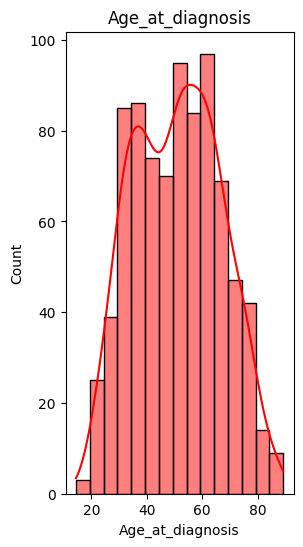

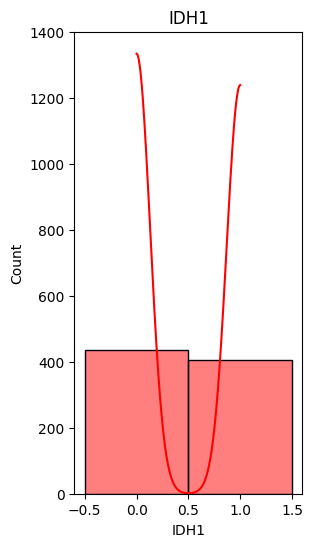

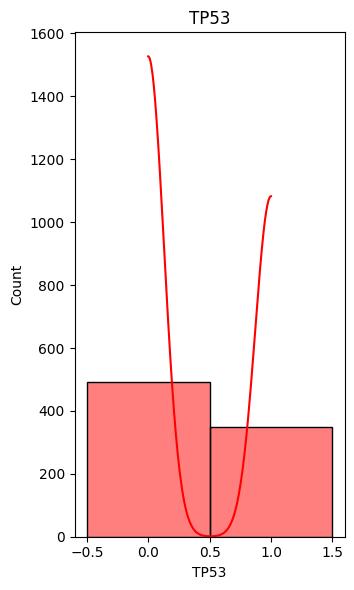

In [51]:
print("Histograma de al menos 3 variables numéricas")
selected_features = ['Age_at_diagnosis', 'IDH1', 'TP53']
# Removed df[selected_features].hist(figsize=(10, 6)) to avoid duplicate plots

for i,col in enumerate(selected_features):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, len(selected_features), i + 1) # Adjusted subplot grid
    sns.histplot(df[col], kde=True, color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

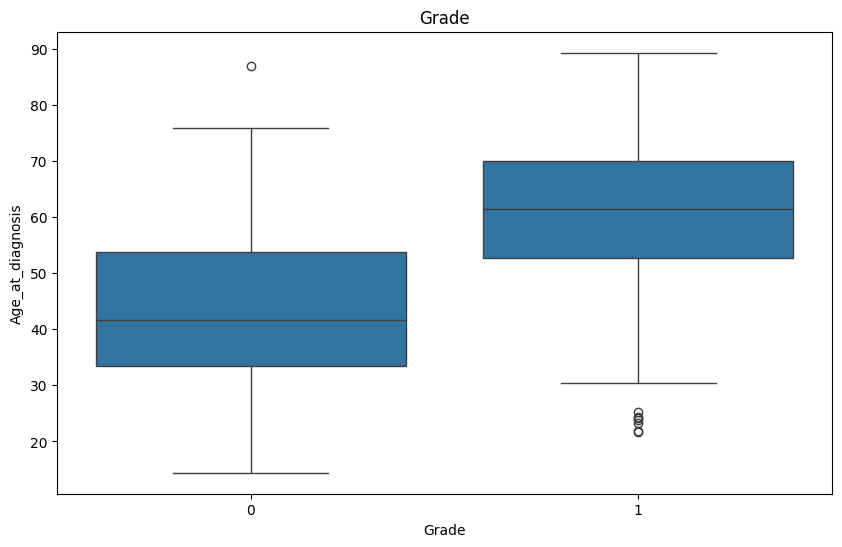

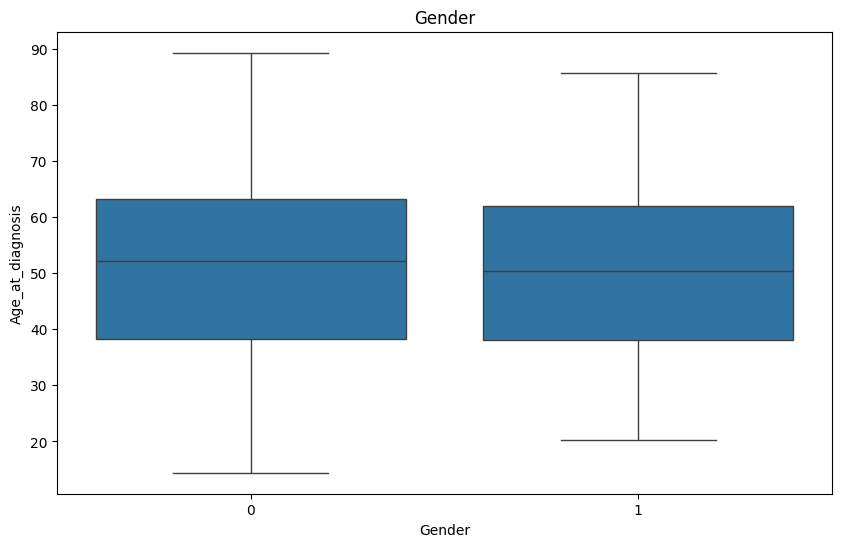

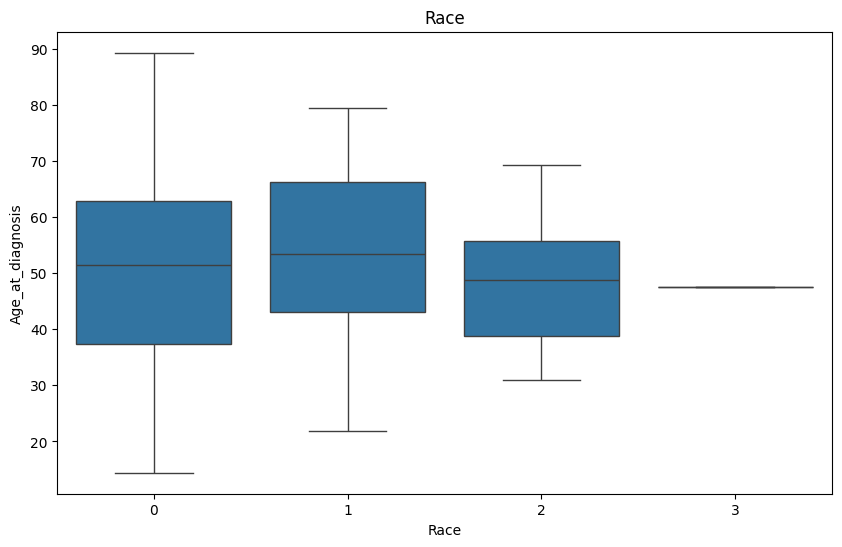

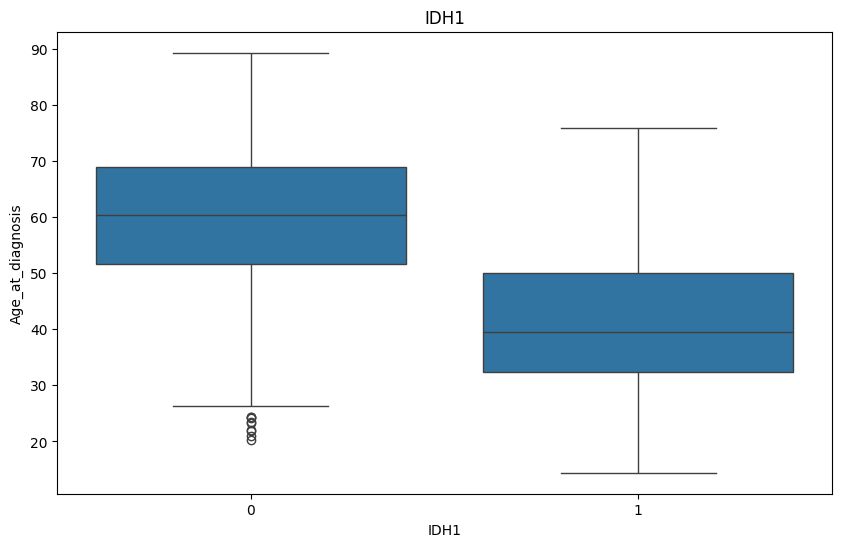

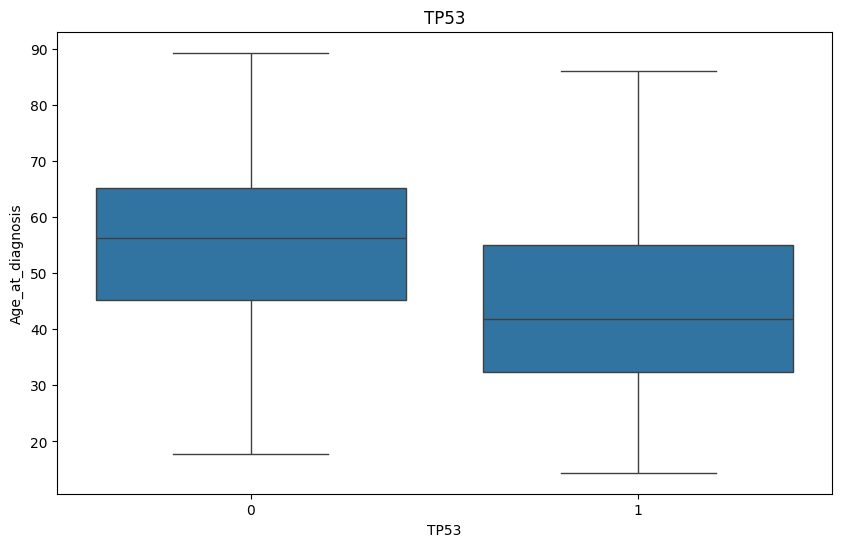

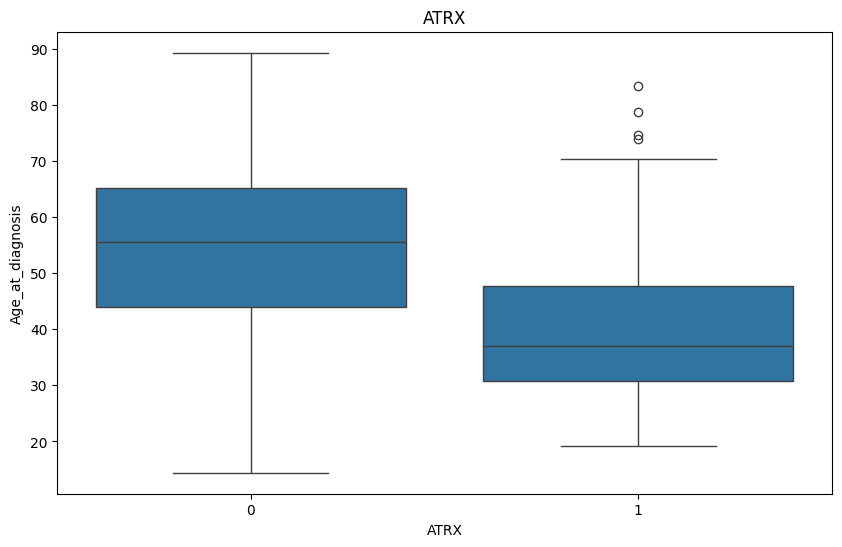

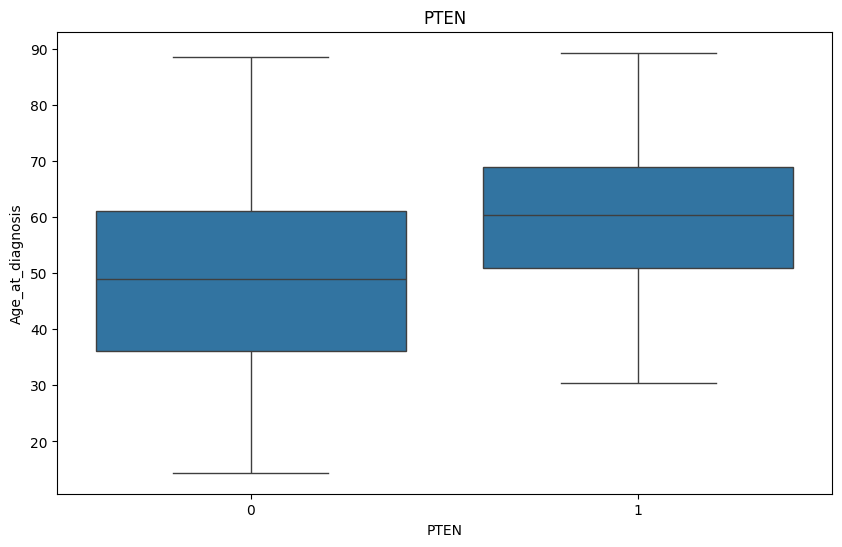

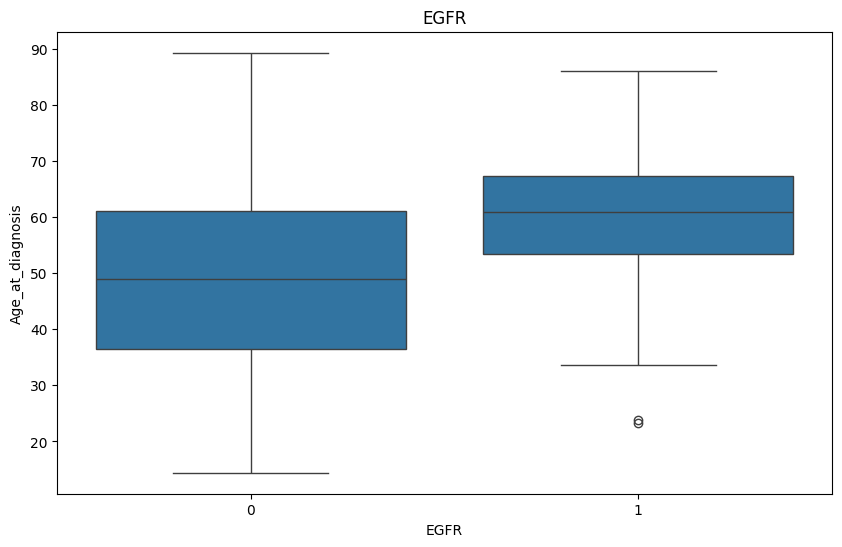

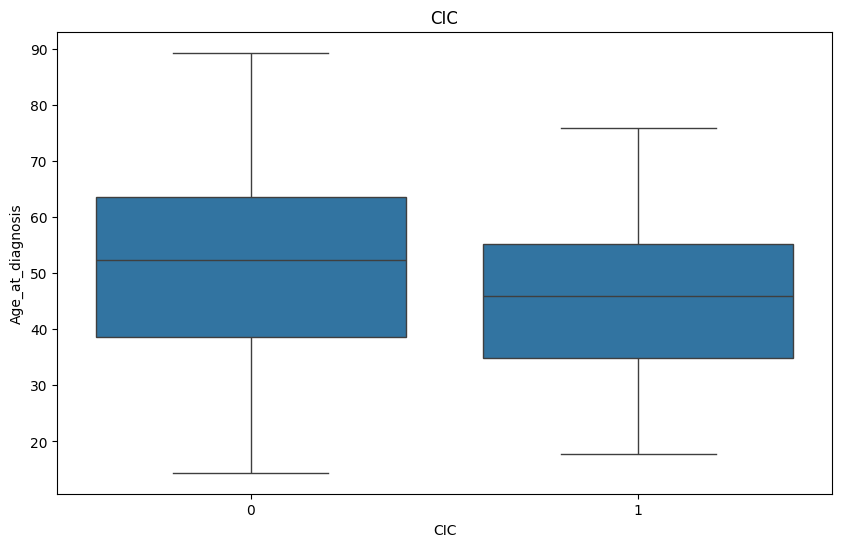

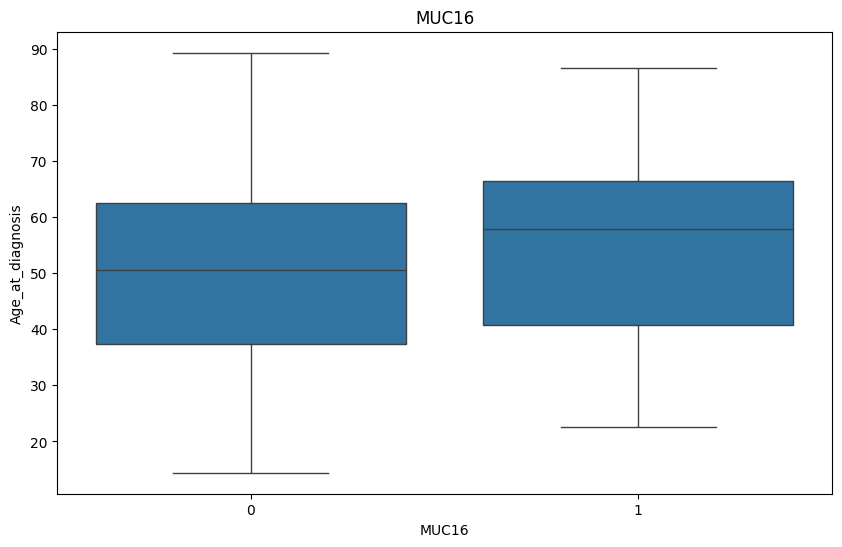

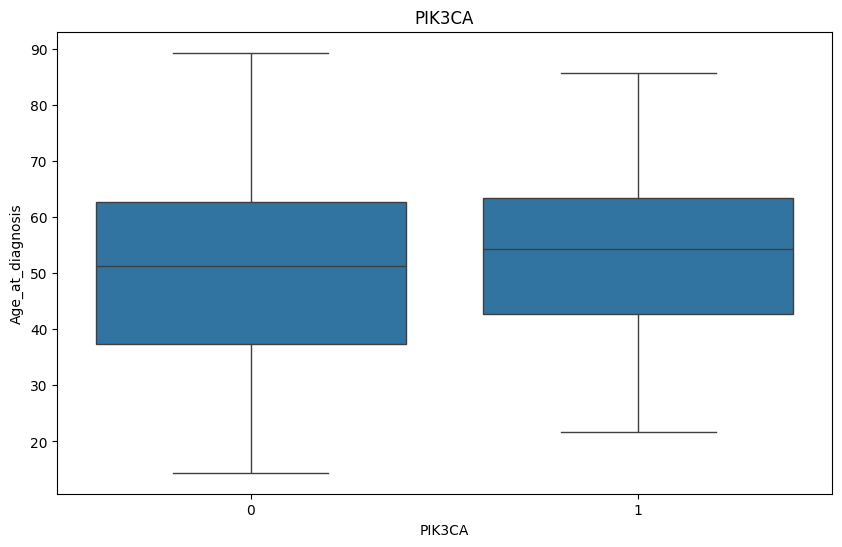

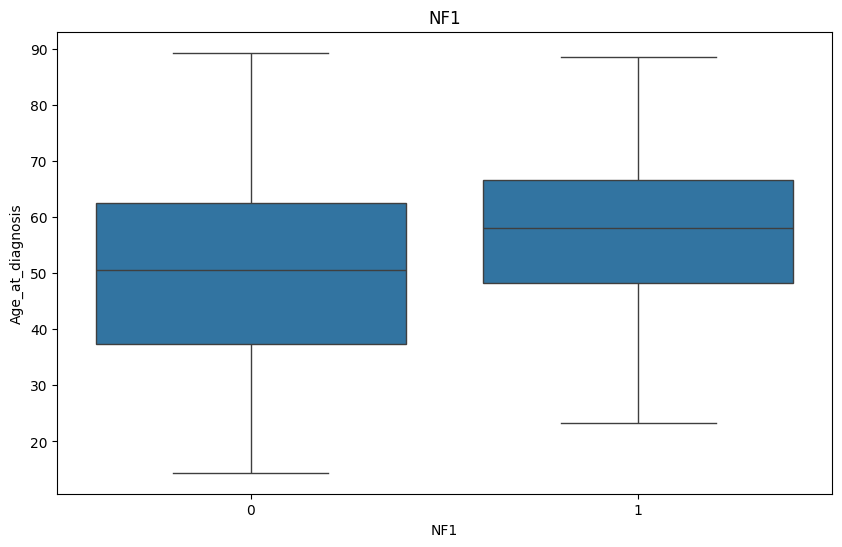

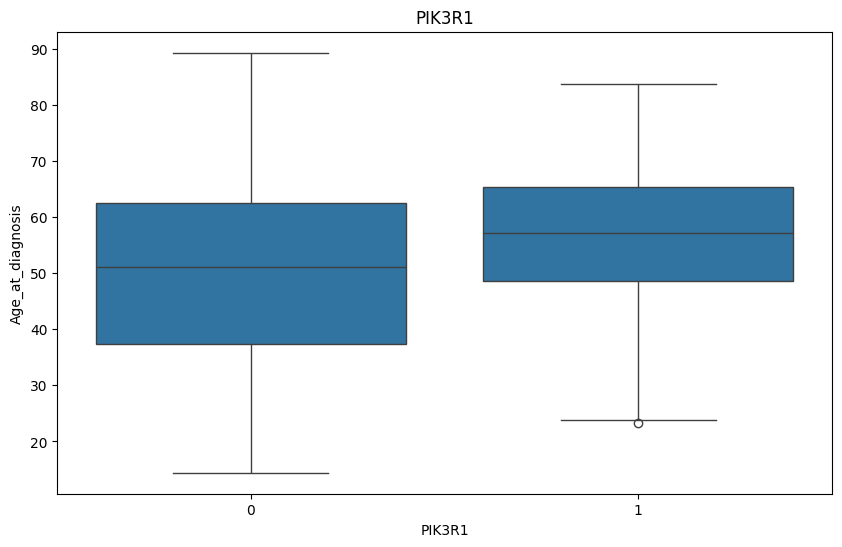

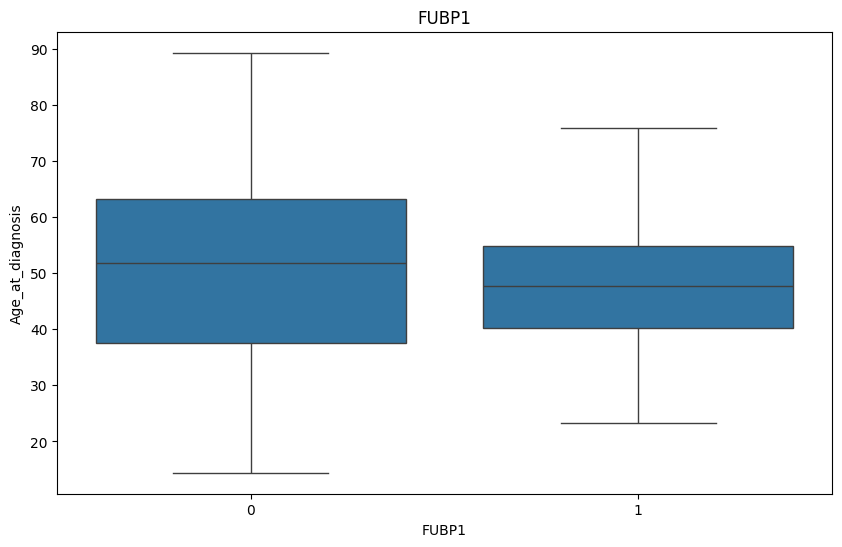

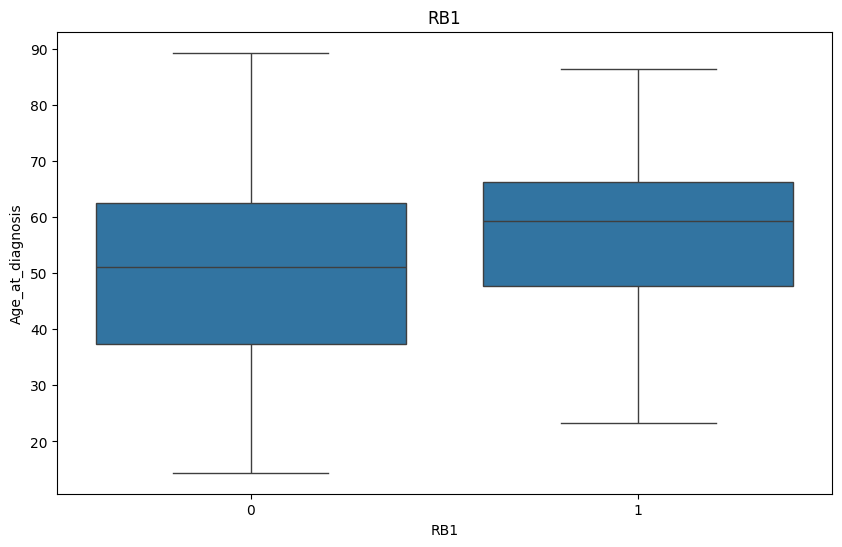

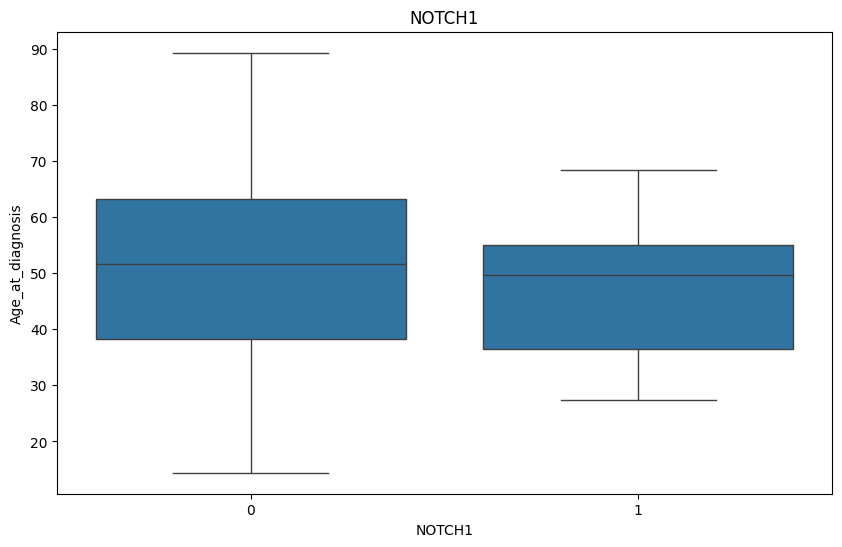

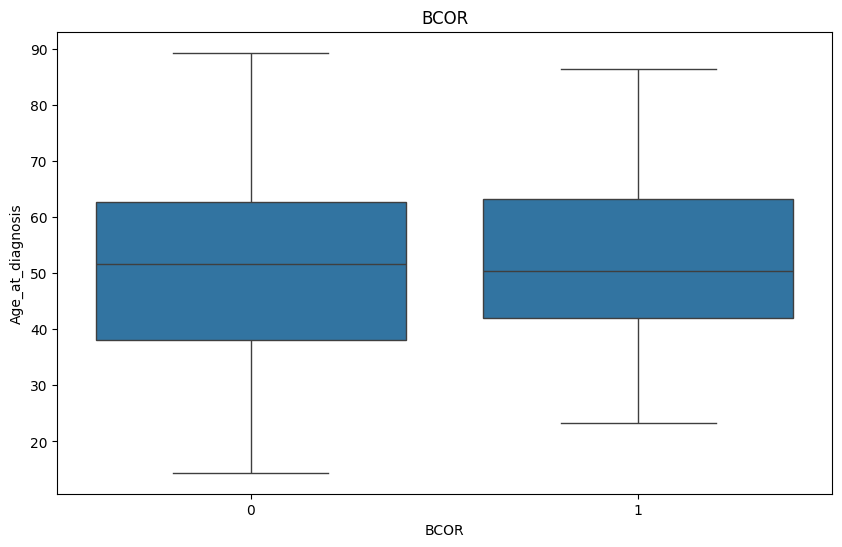

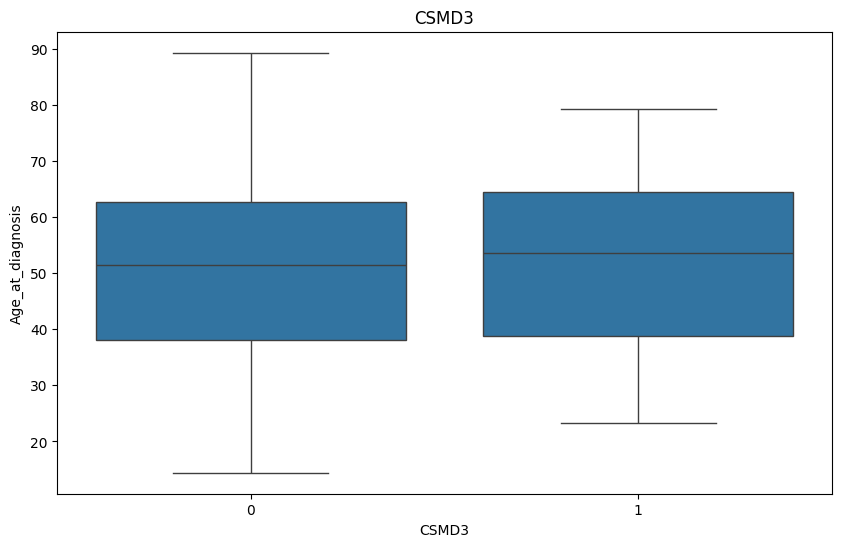

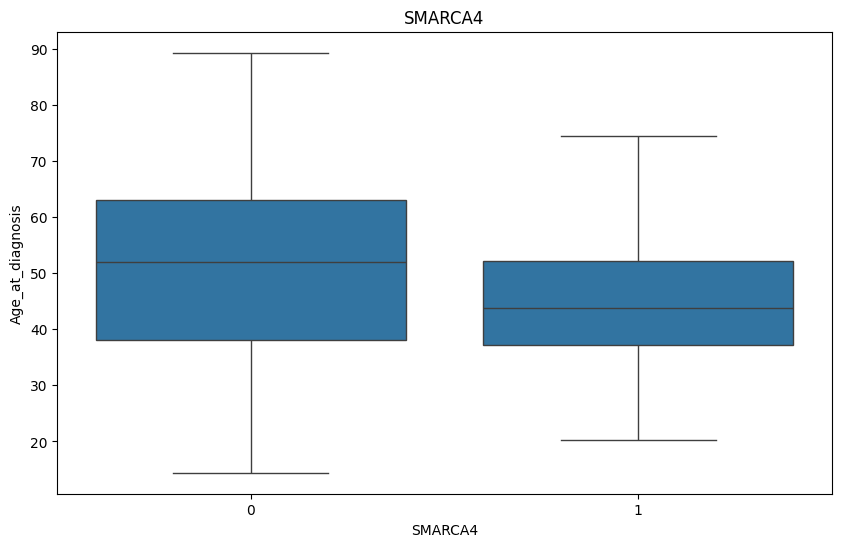

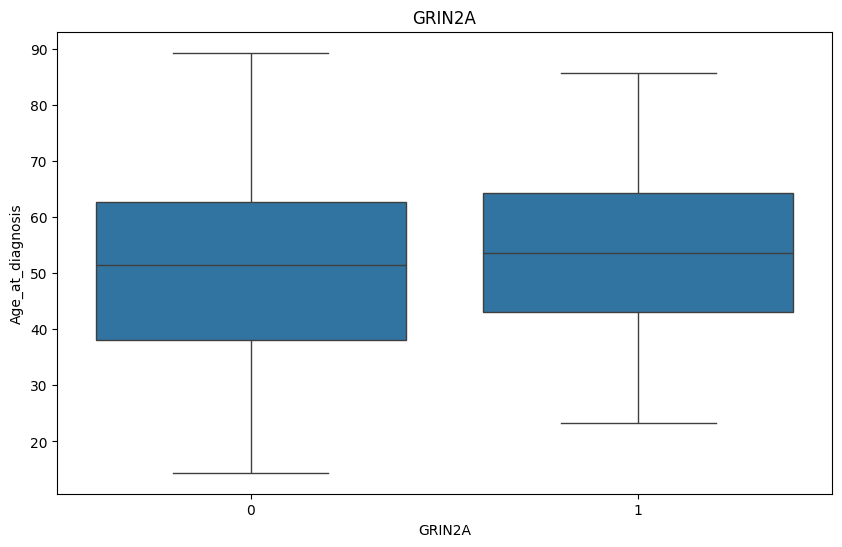

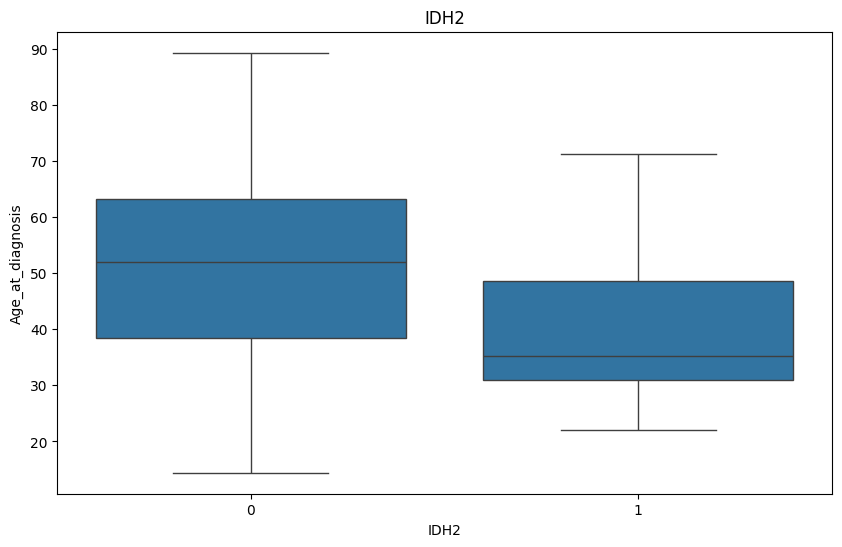

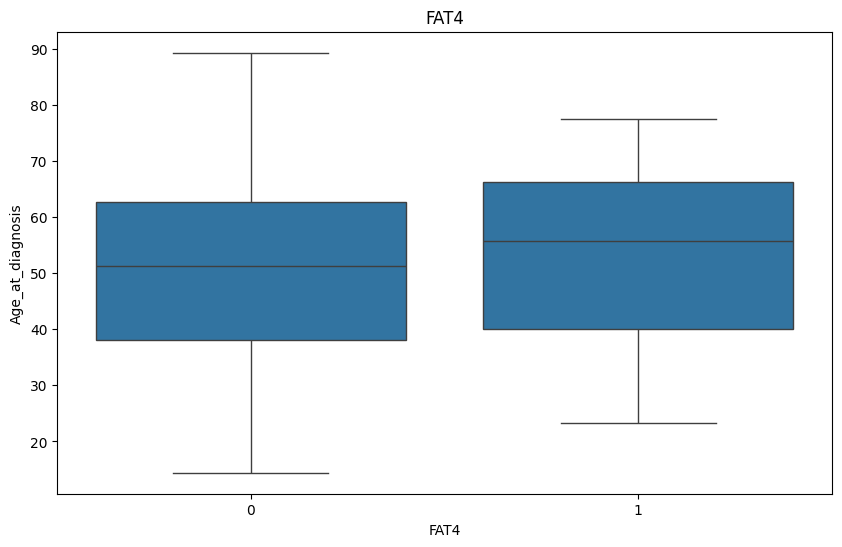

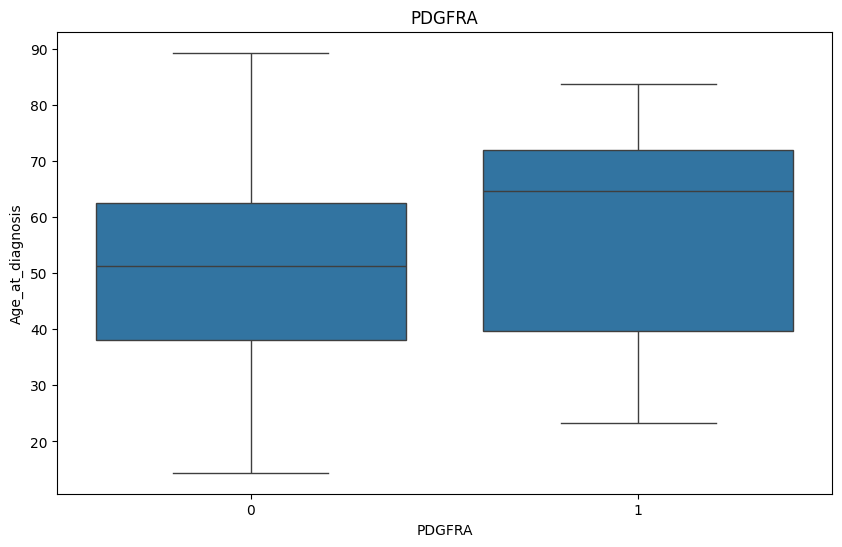

Grade


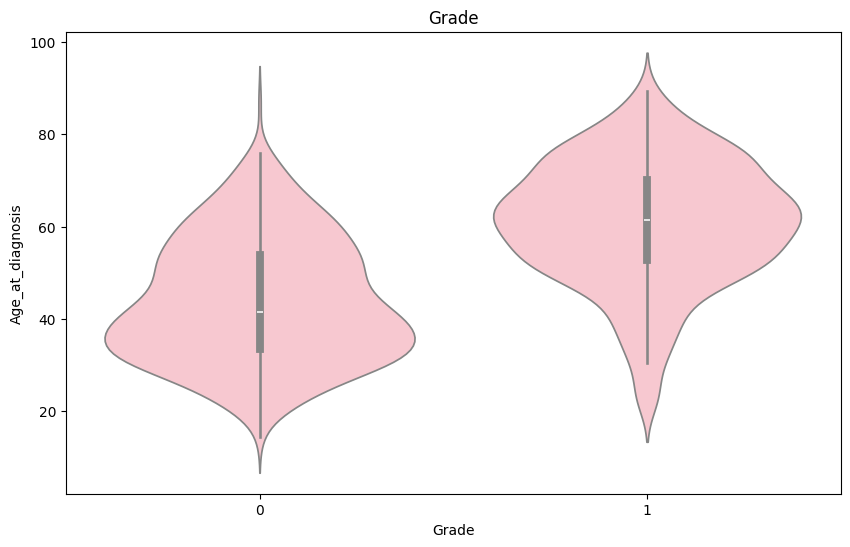

Gender


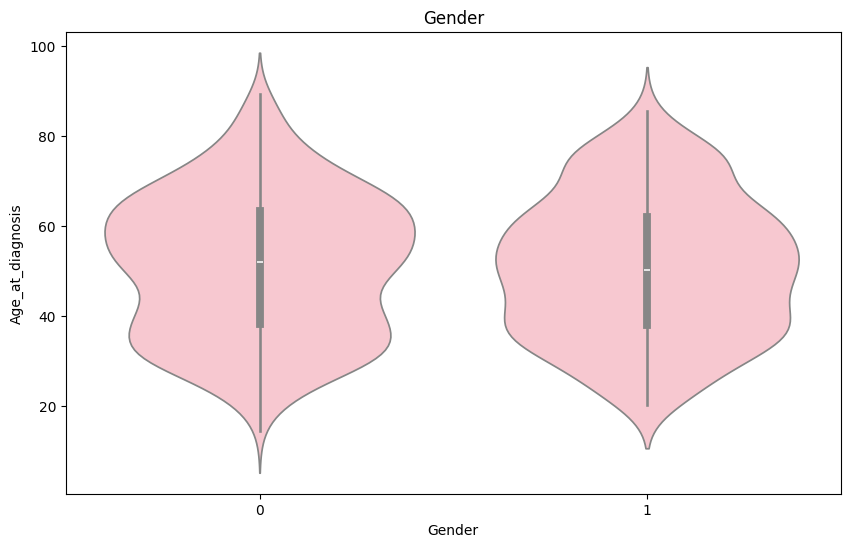

Race


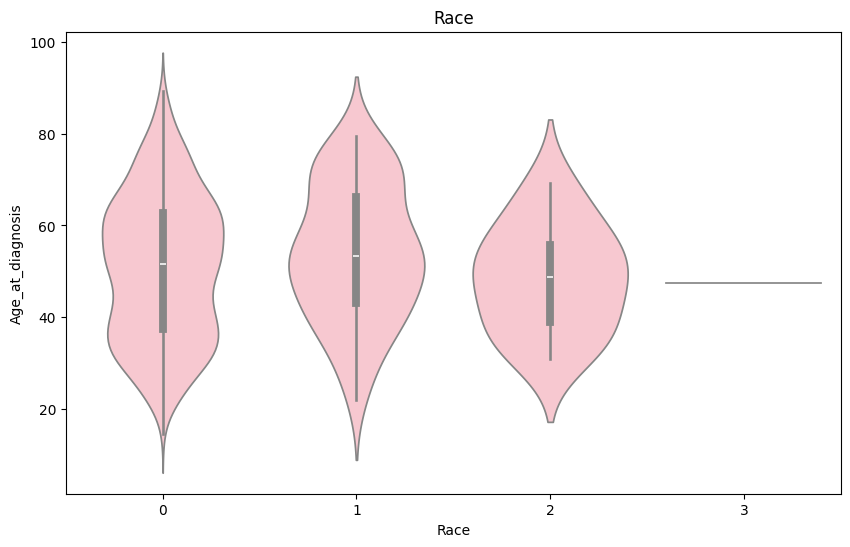

IDH1


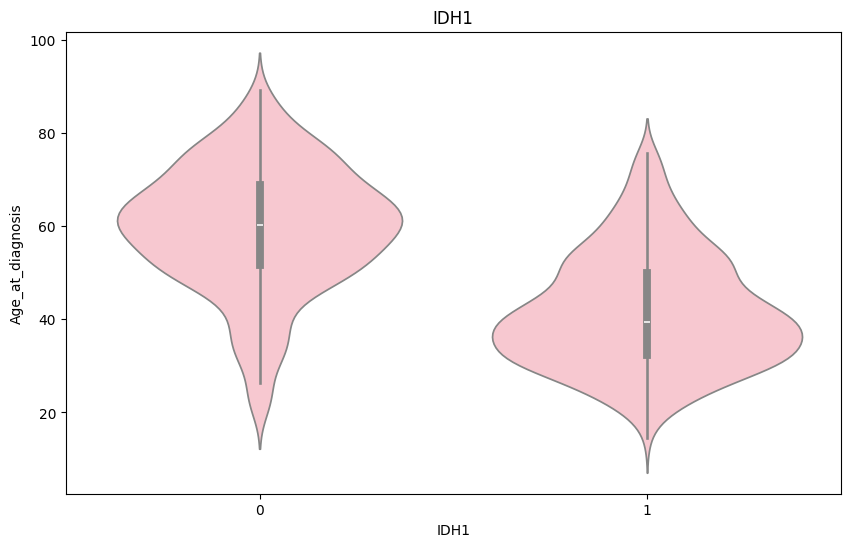

TP53


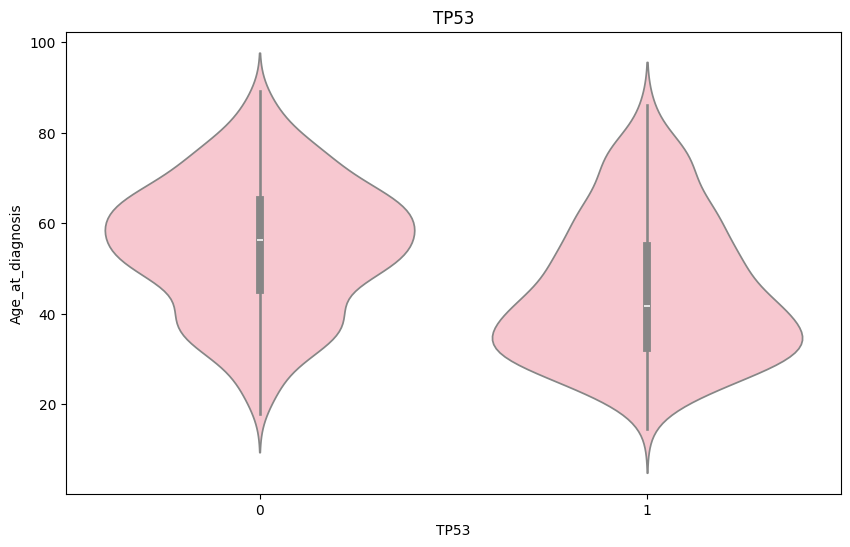

ATRX


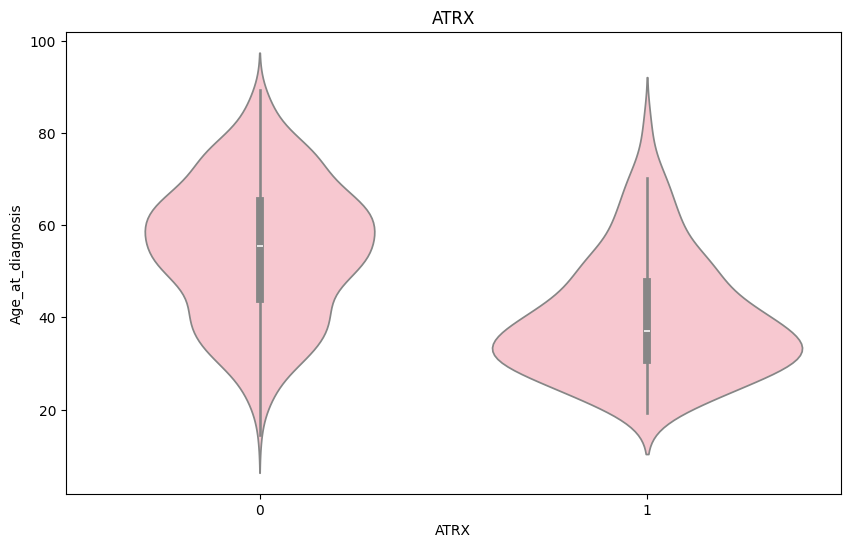

PTEN


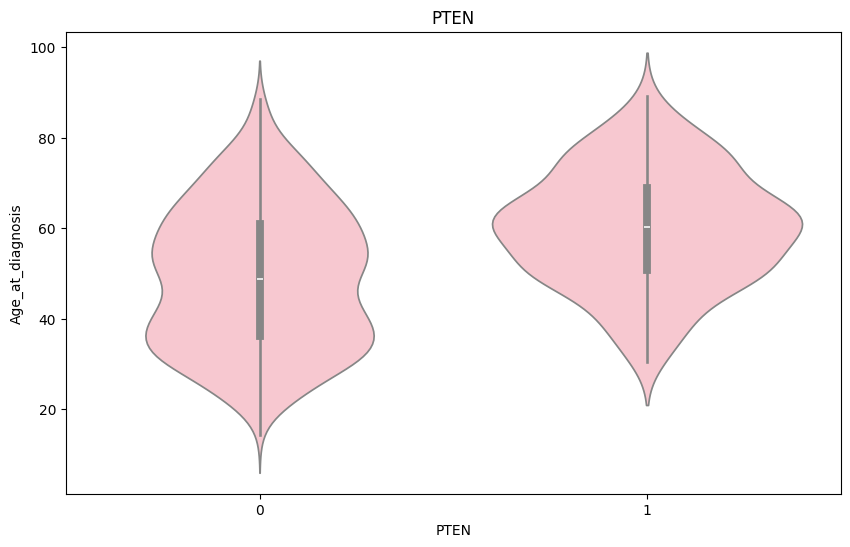

EGFR


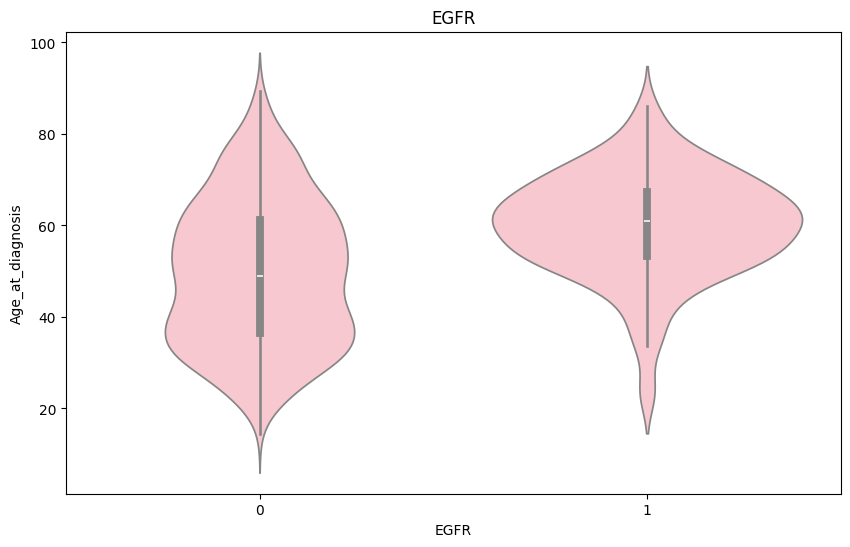

CIC


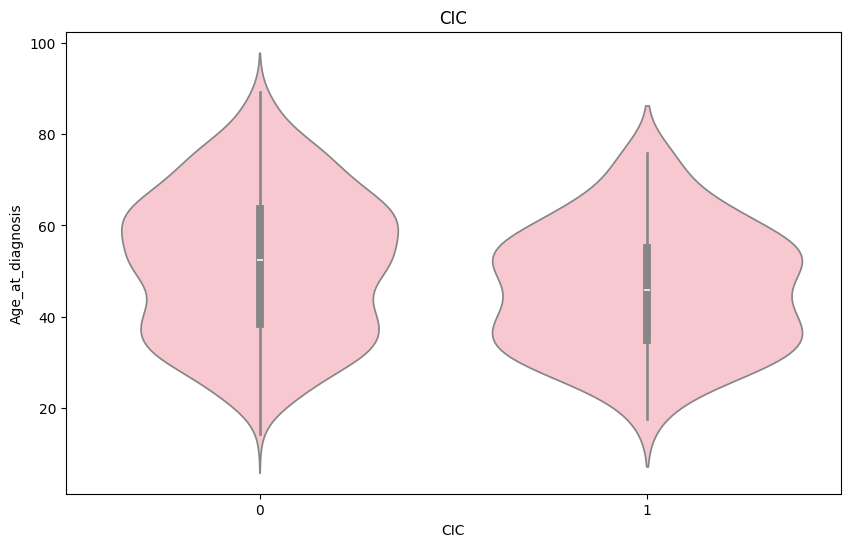

MUC16


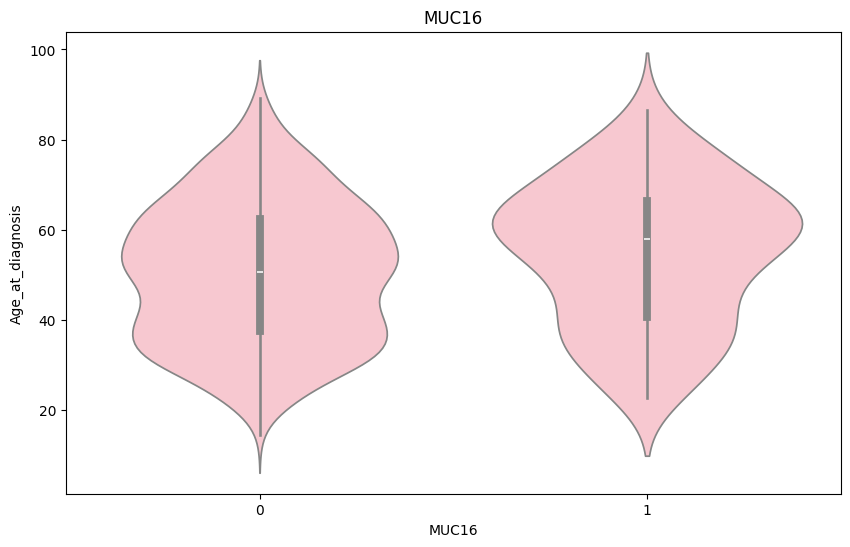

PIK3CA


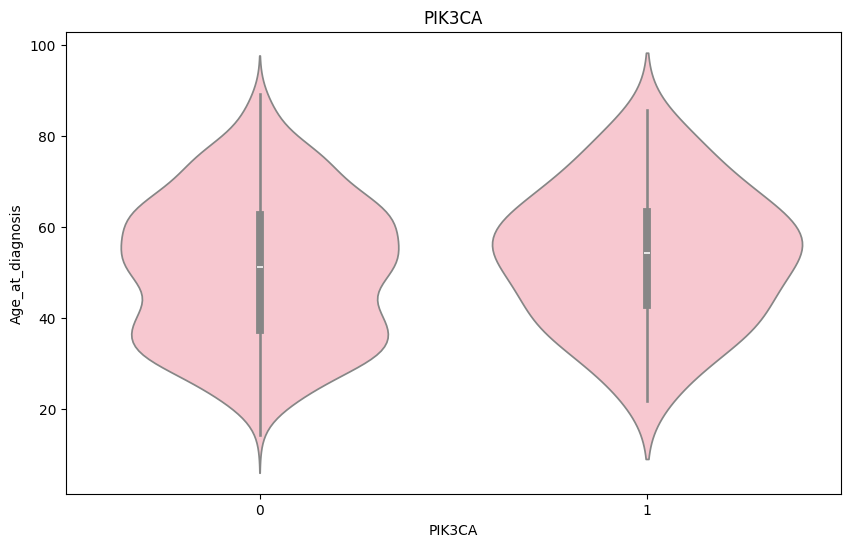

NF1


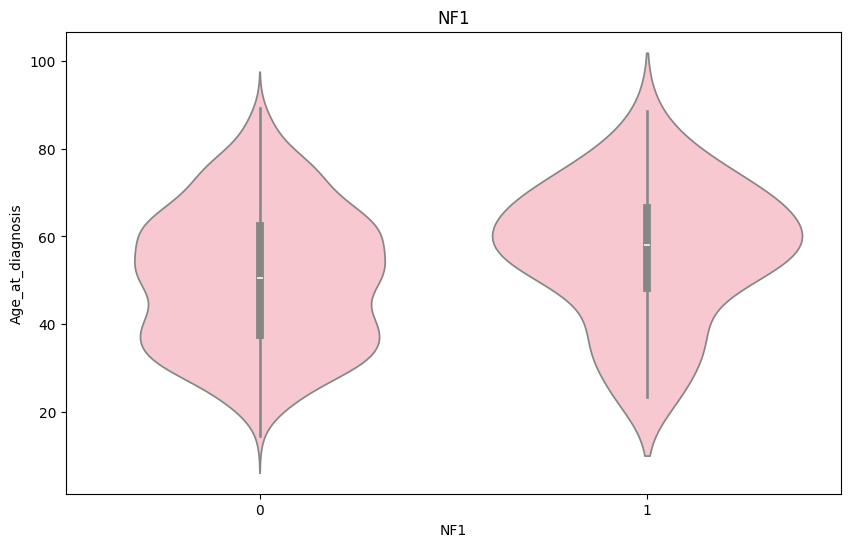

PIK3R1


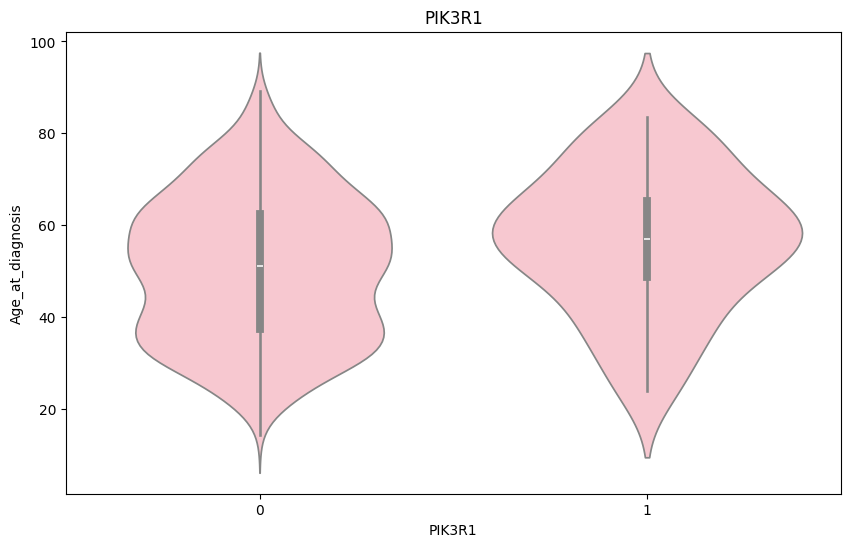

FUBP1


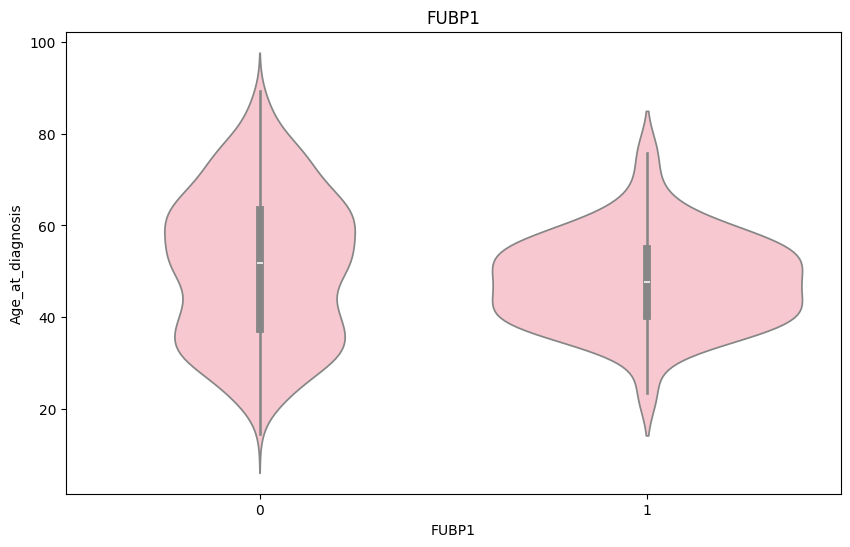

RB1


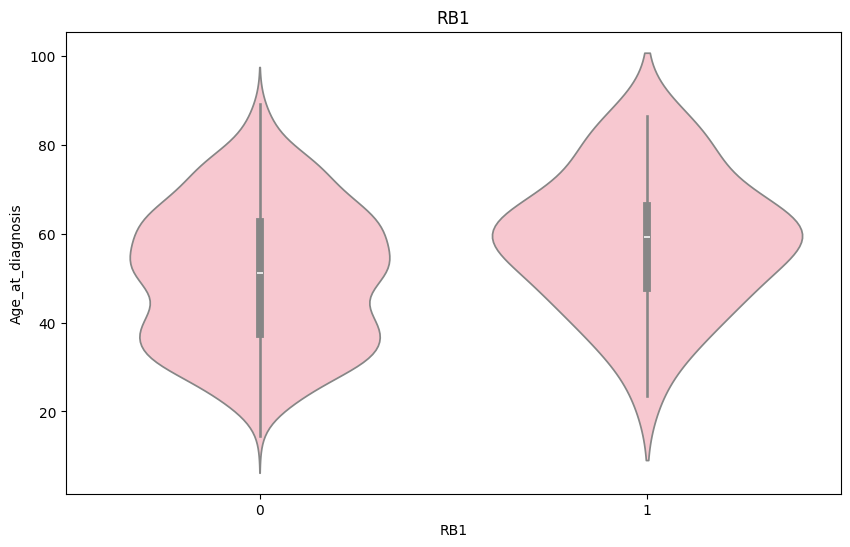

NOTCH1


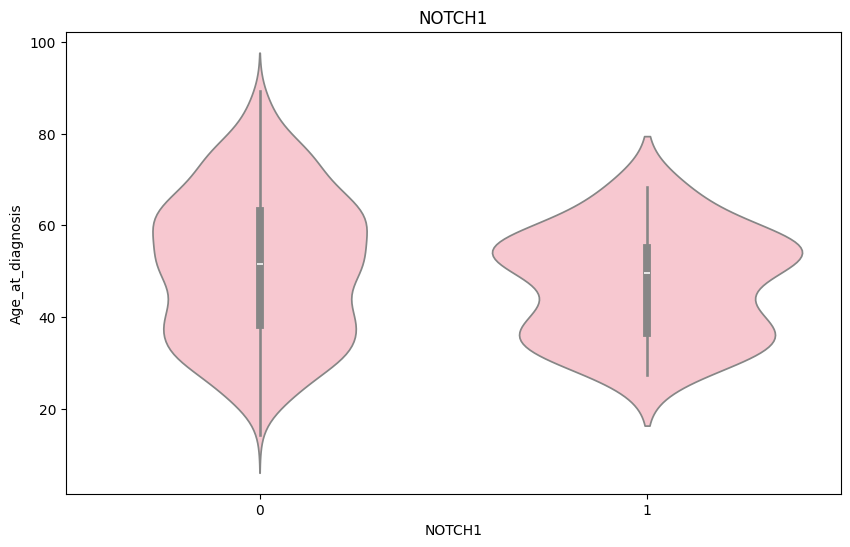

BCOR


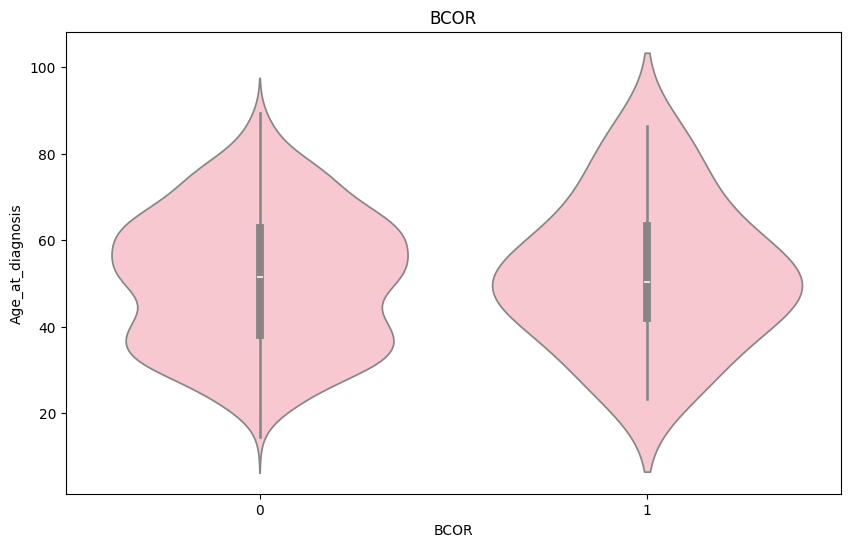

CSMD3


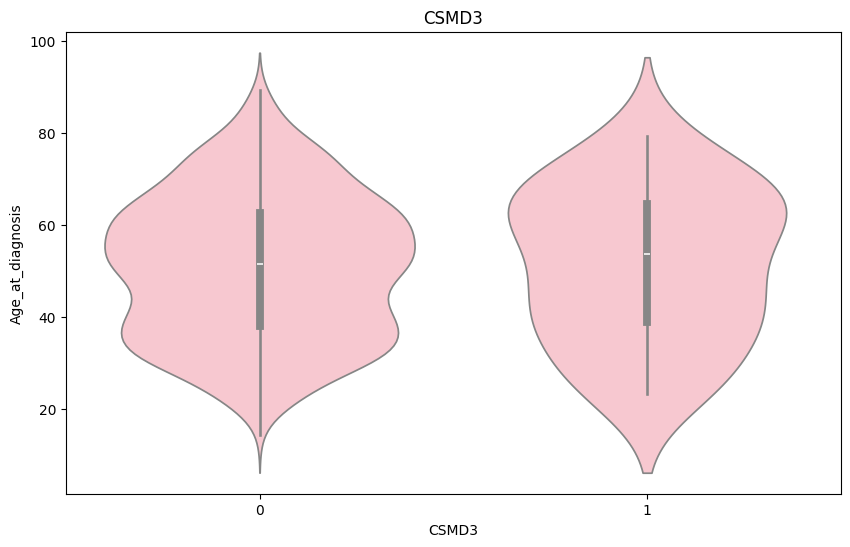

SMARCA4


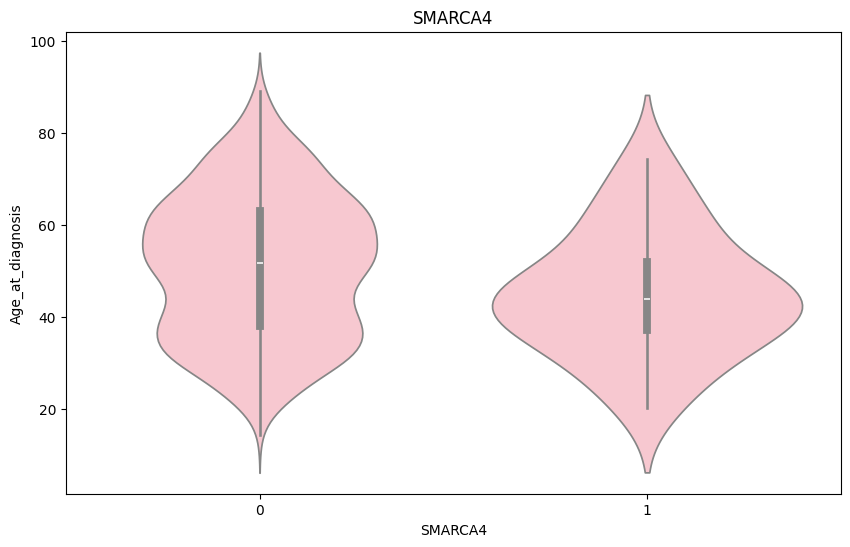

GRIN2A


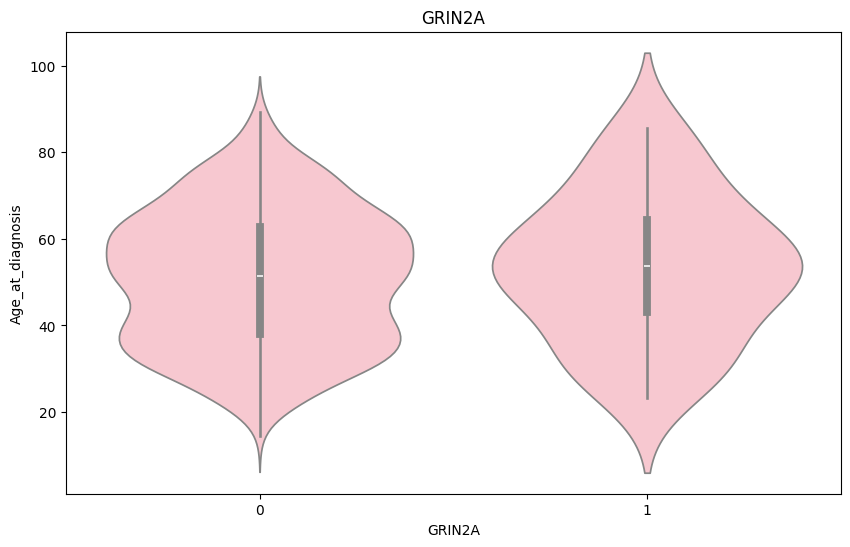

IDH2


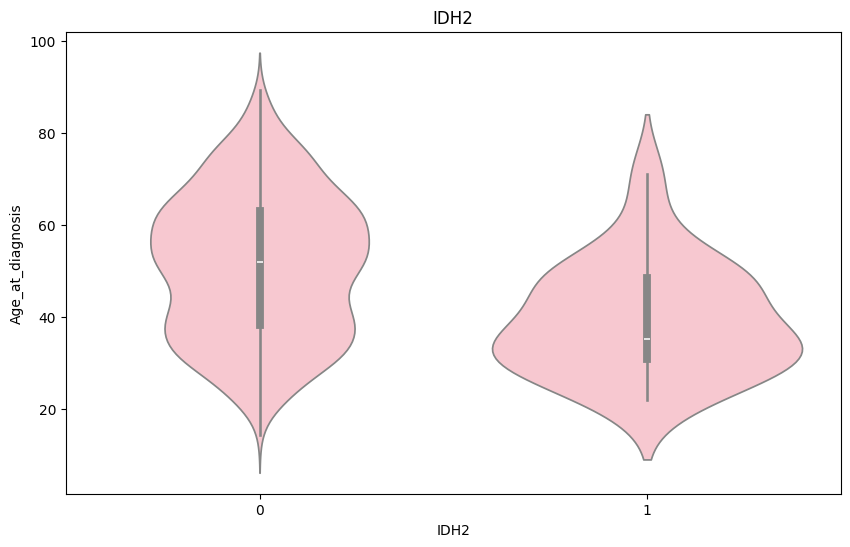

FAT4


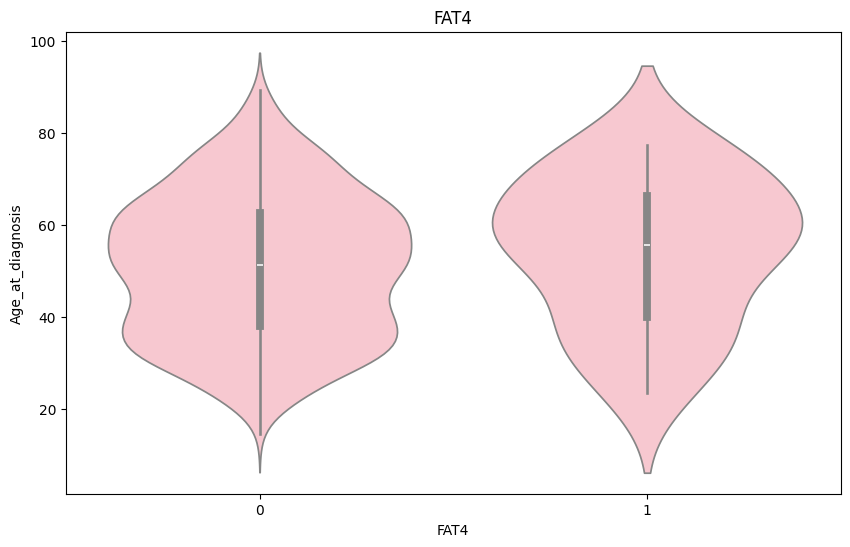

PDGFRA


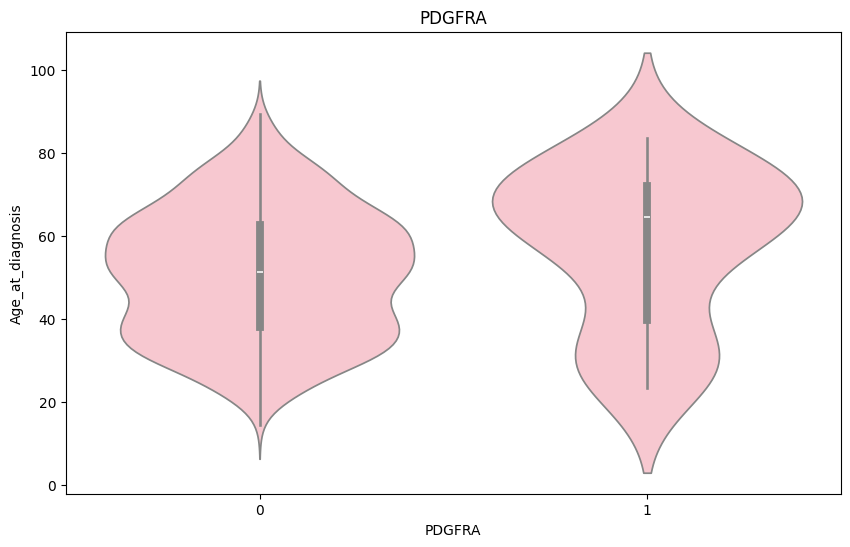

In [52]:
#boxplots
categorical_cols = df.columns.drop('Age_at_diagnosis')
df[categorical_cols] = df[categorical_cols].astype('category')

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Age_at_diagnosis', data=df)
    plt.title(col)
    plt.show()
#violin
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    print(col)
    sns.violinplot(x=col, y='Age_at_diagnosis', data=df, color='pink')
    plt.title(col)
    plt.show()


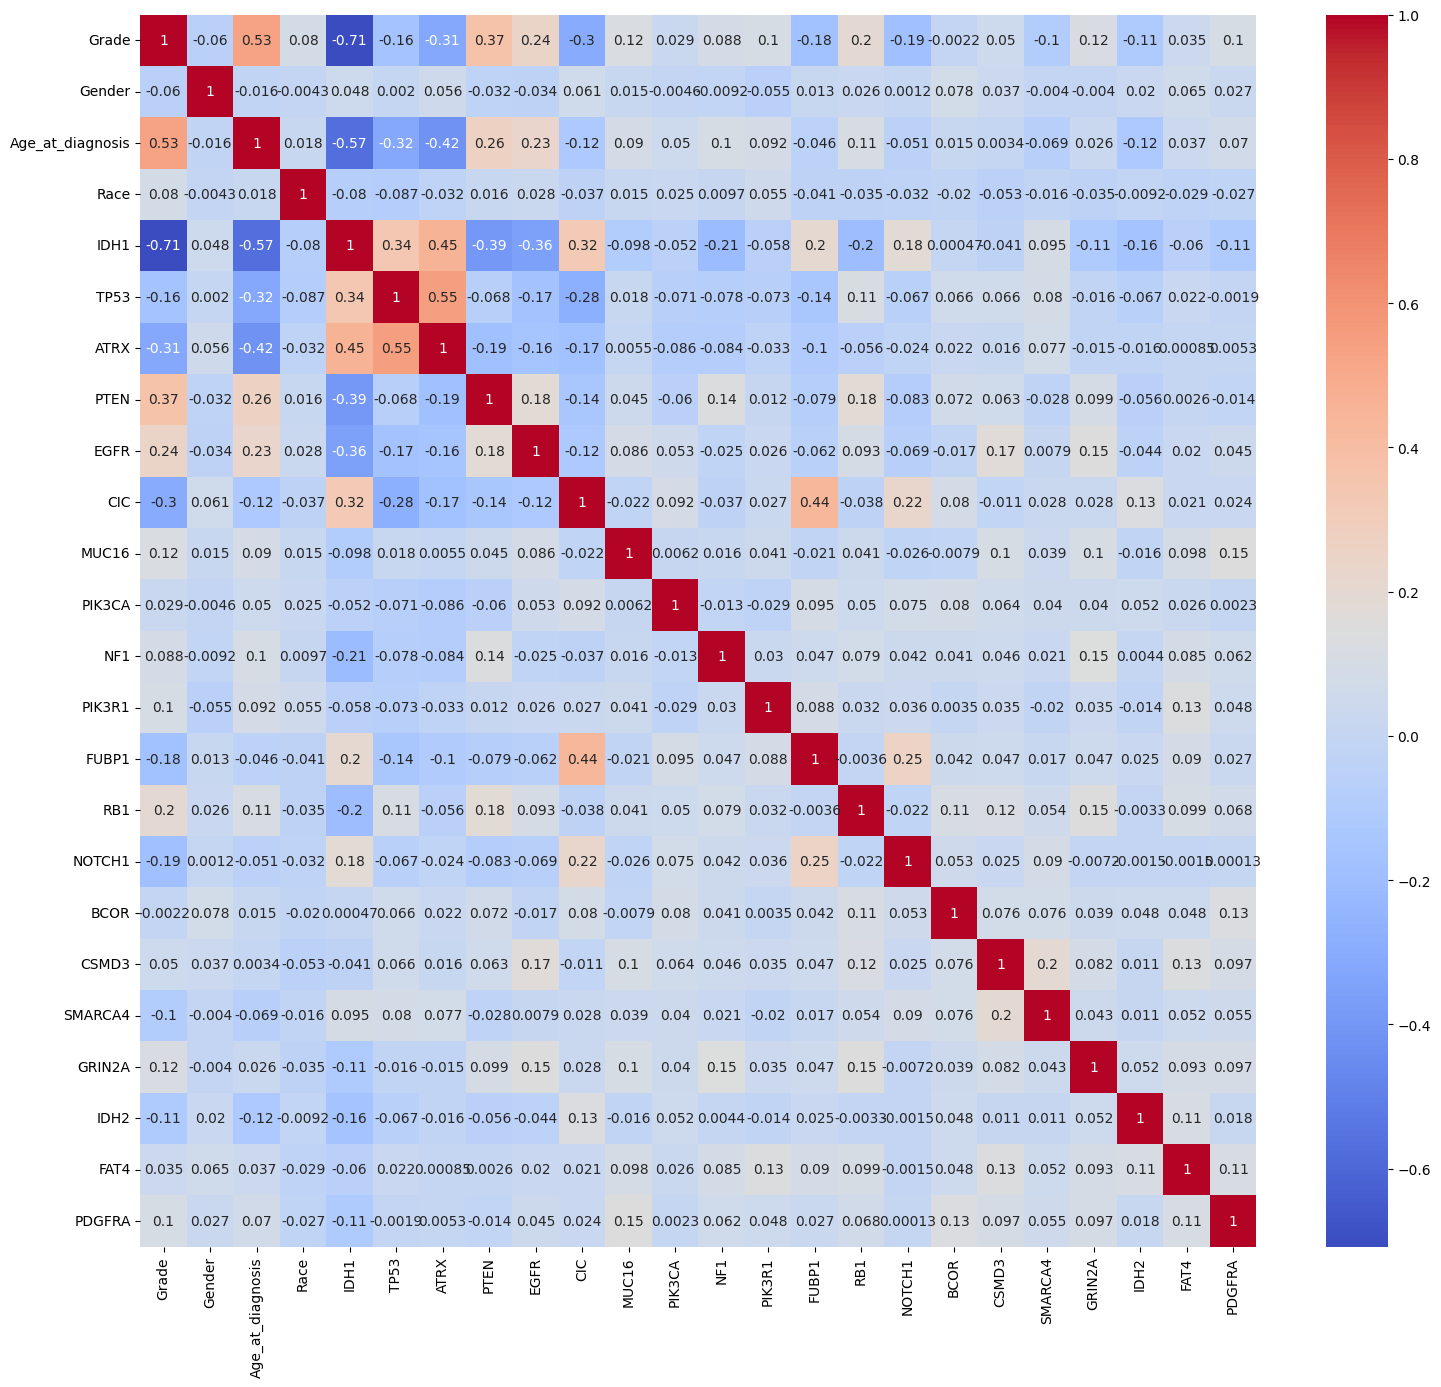

In [53]:
#mapa de calor onehotencoder por que casi todo es categorico
cat_col=df.select_dtypes(include=['category']).columns
num_col=df.select_dtypes(include=['int64','float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col), # Changed numerical_cols to num_col
        ('cat', categorical_transformer, cat_col) # Changed categorical_cols to cat_col
    ]
)

corr_matrix = df.corr()
plt.figure(figsize=(18, 16))
map = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

* ¿Existen clases desbalanceadas?

Sí, comenzando con la variable objetivo donde la distribucion es de 487 a 352. Y en casos como RB1 es de 799 vs 40 lo que indica que el modelo no podra aprender correctamente del impacto de distribuciones como esa.


* ¿Qué atributos parecen más informativos?
Los atributos más balanceados son IDH1 (404 vs. 435), TP53 (348 vs. 491) y Age_at_diagnosis que se distribuye en un rango amplio de valores.

##3. Gráfica de Errores en Entrenamiento y Prueba

* En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
* Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
* Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
* Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
* Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
* Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

In [54]:

x=df.drop('Grade',axis=1)
y=df['Grade']

max_depths = [2, 5, 10, 15, 20, 25, 30, None]
skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

f1_macro_results_mean = []
f1_macro_results_std = []
print("--- Evaluación de F1 Macro por Profundidad (Cross-Validation) ---")
for depth in max_depths:
    # random_state=7 para el modelo dentro del bucle
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=7)

    # Usar cross_val_score para entrenar y evaluar con F1 Macro
    # Se usa el objeto skf_cv (random_state=3)
    scores = cross_val_score(
        estimator=dtc,
        X=x, # Explicitly name the feature data argument as X
        y=y,
        cv=skf_cv,
        scoring='f1_macro',
        n_jobs=-1
    )

    f1_macro_results_mean.append(scores.mean())
    f1_macro_results_std.append(scores.std())

    # Imprimir resultados
    depth_label = str(depth) if depth is not None else 'None'
    print(f"Profundidad={depth_label}: F1 Macro Media={scores.mean():.4f}, Desv. Estándar={scores.std():.4f}")

--- Evaluación de F1 Macro por Profundidad (Cross-Validation) ---
Profundidad=2: F1 Macro Media=0.8665, Desv. Estándar=0.0372
Profundidad=5: F1 Macro Media=0.8565, Desv. Estándar=0.0378
Profundidad=10: F1 Macro Media=0.8225, Desv. Estándar=0.0389
Profundidad=15: F1 Macro Media=0.7899, Desv. Estándar=0.0422
Profundidad=20: F1 Macro Media=0.7979, Desv. Estándar=0.0481
Profundidad=25: F1 Macro Media=0.7987, Desv. Estándar=0.0447
Profundidad=30: F1 Macro Media=0.7948, Desv. Estándar=0.0454
Profundidad=None: F1 Macro Media=0.7948, Desv. Estándar=0.0454


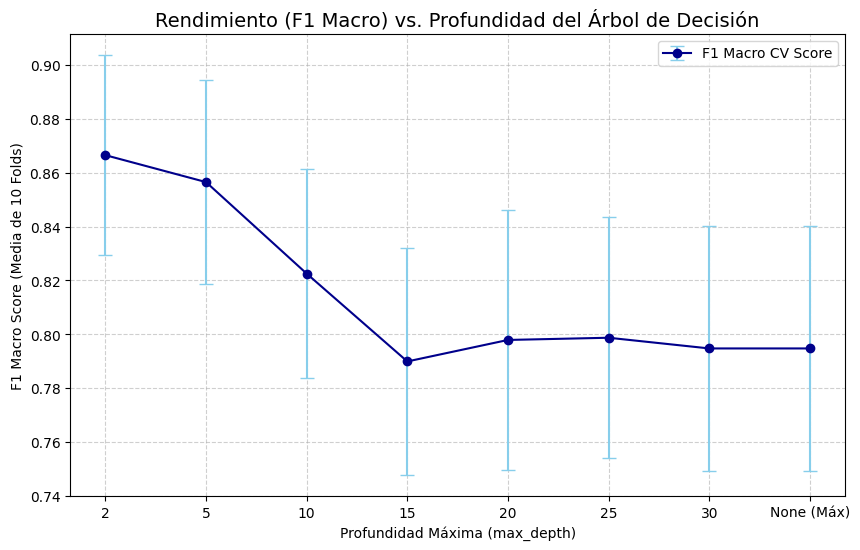

In [55]:
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d is not None else 'None (Máx)' for d in max_depths]
plt.errorbar(
    x=depth_labels,
    y=f1_macro_results_mean,
    yerr=f1_macro_results_std,
    fmt='-o',
    capsize=5,
    color='darkblue',
    ecolor='skyblue',
    label='F1 Macro CV Score'
)

plt.title('Rendimiento (F1 Macro) vs. Profundidad del Árbol de Decisión', fontsize=14)
plt.xlabel('Profundidad Máxima (max_depth)')
plt.ylabel('F1 Macro Score (Media de 10 Folds)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

##4. Optimización de hiperparámetros con RandomizedSearchCV

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:

Usa el árbol de decisión
1. Criterion = gini ,entropy
2. max_depth: de 5 a 50 con incrementos de 1
3. min_samples_split: de 2 a 20 con incrementos de 1
* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* n_iter = 5 (combinaciones aleatorias a buscar)
* n_jobs = -1 para acelerar cómputo
* Métrica de evaluación: f1 Macro
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [56]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 51),
    'min_samples_split': randint(2, 21)
}
skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=3),
    param_distributions=param_dist,
    n_iter=5,               # 5 combinaciones aleatorias a probar
    scoring='f1_macro',     # Métrica solicitada
    cv=skf_cv,              # Stratified K-Fold
    n_jobs=-1,              # Acelerar cómputo
    random_state=7,
    verbose=1
)

start_time = time.time()
random_search.fit(x, y)
end_time = time.time()
time_rand = end_time - start_time

print("Tiempo de ejecución: {:.2f} segundos".format(time_rand))
print("Mejores Hiperparámetros encontrados:")
print(random_search.best_params_)
print("\nMejor Score (F1 Macro CV):")
print("{:.4f}".format(random_search.best_score_))



Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tiempo de ejecución: 0.74 segundos
Mejores Hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5}

Mejor Score (F1 Macro CV):
0.8457


##5. Optimización de hiperparámetros con GridSearchCV


* Define el espacio de búsqueda  para los siguientes hiperpárametros:Usa el árbol de decisión
1. Criterion = gini ,entropy
2. max_depth: de 5 a 50 con incrementos de 1
3. min_samples_split: de 2 a 20 con incrementos de 1
* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* Métrica de evaluación: f1 Macro
* n_jobs = -1 para acelerar cómputo
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score


In [58]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),        # Rango completo: 5 a 50
    'min_samples_split': np.arange(2, 21, 1) # Rango completo: 2 a 20
}

skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=3),
    param_grid=param_grid,
    scoring='f1_macro',     # Métrica solicitada
    cv=skf_cv,              # Validación cruzada estratificada (10 folds)
    n_jobs=-1,              # Acelerar cómputo
    verbose=1
)

start_time = time.time()
grid_search.fit(x, y)
end_time = time.time()
time_grid = end_time - start_time

print("Tiempo de ejecución: {:.2f} segundos".format(time_grid))
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 10 folds for each of 1748 candidates, totalling 17480 fits
Tiempo de ejecución: 247.47 segundos
Mejores Hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': np.int64(5), 'min_samples_split': np.int64(13)}


##6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:Usa el árbol de decisión
1. Criterion = gini ,entropy
2. max_depth: de 5 a 50 con incrementos de 1
3. min_samples_split: de 2 a 20 con incrementos de 1
* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* n_iter = 5 (combinaciones aleatorias a buscar)
* n_jobs = -1 para acelerar cómputo
* Métrica de evaluación: accuracy
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [60]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 51),        # De 5 a 50 (51 es exclusivo)
    'min_samples_split': randint(2, 21) # De 2 a 20 (21 es exclusivo)
}

skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
random_search_acc = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=3),
    param_distributions=param_dist,
    n_iter=5,
    scoring='accuracy',
    cv=skf_cv,
    n_jobs=-1,
    random_state=7,
    verbose=1
)

start_time_acc = time.time()
random_search_acc.fit(x, y)
end_time_acc = time.time()
time_rand_acc = end_time_acc - start_time_acc

print("Tiempo de ejecución: {:.2f} segundos".format(time_rand_acc))
print("Mejores Hiperparámetros encontrados:")
print(random_search_acc.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tiempo de ejecución: 5.17 segundos
Mejores Hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5}


##7. Optimización de hiperparámetros con GridSearchCV: accuracy


* Define el espacio de búsqueda  para los siguientes hiperpárametros:Usa el árbol de decisión
1. Criterion = gini ,entropy
2. max_depth: de 5 a 50 con incrementos de 1
3. min_samples_split: de 2 a 20 con incrementos de 1
* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* Métrica de evaluación: f1 Macro
* n_jobs = -1 para acelerar cómputo
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),        # Rango completo: 5 a 50
    'min_samples_split': np.arange(2, 21, 1) # Rango completo: 2 a 20
}

skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search_acc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=3),
    param_grid=param_grid,
    scoring='accuracy',     # Métrica solicitada (Priorizando el título del punto 7)
    cv=skf_cv,              # Validación cruzada estratificada (10 folds)
    n_jobs=-1,              # Usar todos los núcleos
    verbose=1
)

start_time_acc = time.time()
grid_search_acc.fit(x, y)
end_time_acc = time.time()
time_grid_acc = end_time_acc - start_time_acc

print("Tiempo de ejecución: {:.2f} segundos".format(time_grid_acc))
print("Mejores Hiperparámetros encontrados:")
print(grid_search_acc.best_params_)


Fitting 10 folds for each of 1748 candidates, totalling 17480 fits
Tiempo de ejecución: 221.20 segundos
Mejores Hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': np.int64(5), 'min_samples_split': np.int64(13)}


##8.Actividad de reflexión y análisis

* ¿Cuál método encontró mejores hiperparámetros?
*GridSearchCV porque prueba  cada uno de los 1,748 puntos del espacio de búsqueda,k mientras que RandomizedSearchCV solo prueba 5 puntos aleatorios.*


* ¿Cuál fue más costoso computacionalmente?

*Los métodos de GridSearchCV (Puntos 5 y 7) fueron los más costosos.*

*Costo de GridSearchCV (Punto 5 y 7): $247.47$ y $221.20$ segundos (entrenó 17,480 modelos).*

*Costo de RandomizedSearchCV (Punto 4 y 6): $0.74$ y $5.17$ segundos (entrenó solo 50 modelos).*

*El costo es directamente proporcional a la cantidad de modelos entrenados. Grid Search entrenó $349$ veces más modelos que Random Search ($17,480 / 50 \approx 349.6$).*

* ¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?

*Sí, fueron distintos (0.8457 vs. $\approx 0.8850$). GridSearchCV (Punto 5) encontró un score mejor porque probó 349 veces más combinaciones que RandomizedSearchCV (Punto 4).*

*  ¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?

*Si son distintos, el GridSearchCV (el método que consume más tiempo) arrojó un score superior porque probó todos los parámetros y encontró la combinación óptima. El RandomizedSearchCV es solo una aproximación rápida que encuentra un score más bajo, pero en mucho menos tiempo.*


* ¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?

*Los valores son ligeramente distintos, pero la combinacion es la misma. En el caso de GridSearchCV la mejor combinacion para ambos es max_depth=5 y min_samples_split=13. Mientras que para RandomizedSearchCV fueron max_depth=9 y min_samples_split=4.*

*Esto significa que no hubo un conflicto de optimización: el árbol que dio mejor acierto general también fue el que dio mejor balance de clases.*

